In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Data Cleaning and Vizualization

In [22]:
data = pd.read_csv('data.csv')

In [23]:
data.head()

,CPU times,RSS memory,VMS memory,Shared memory,Text segment,Data segment,Library code,Memory Percent
0,2.66,5.337660e+06,8.544113e+06,3.076636e+06,20321.240310,2.776786e+06,0.0,0.065394
1,0.06,4.325888e+06,6.727168e+06,2.849280e+06,10752.000000,1.655808e+06,0.0,0.052998
2,0.42,1.907458e+06,6.152568e+06,1.728888e+06,16233.688073,4.017838e+05,0.0,0.023369
3,3.10,7.953507e+06,1.409943e+07,2.056551e+06,8181.604061,8.315036e+06,0.0,0.097442
4,0.77,3.908648e+06,6.977935e+06,3.032104e+06,20214.025974,1.241194e+06,0.0,0.047887


In [24]:
X = data.drop(['Library code'], axis=1)

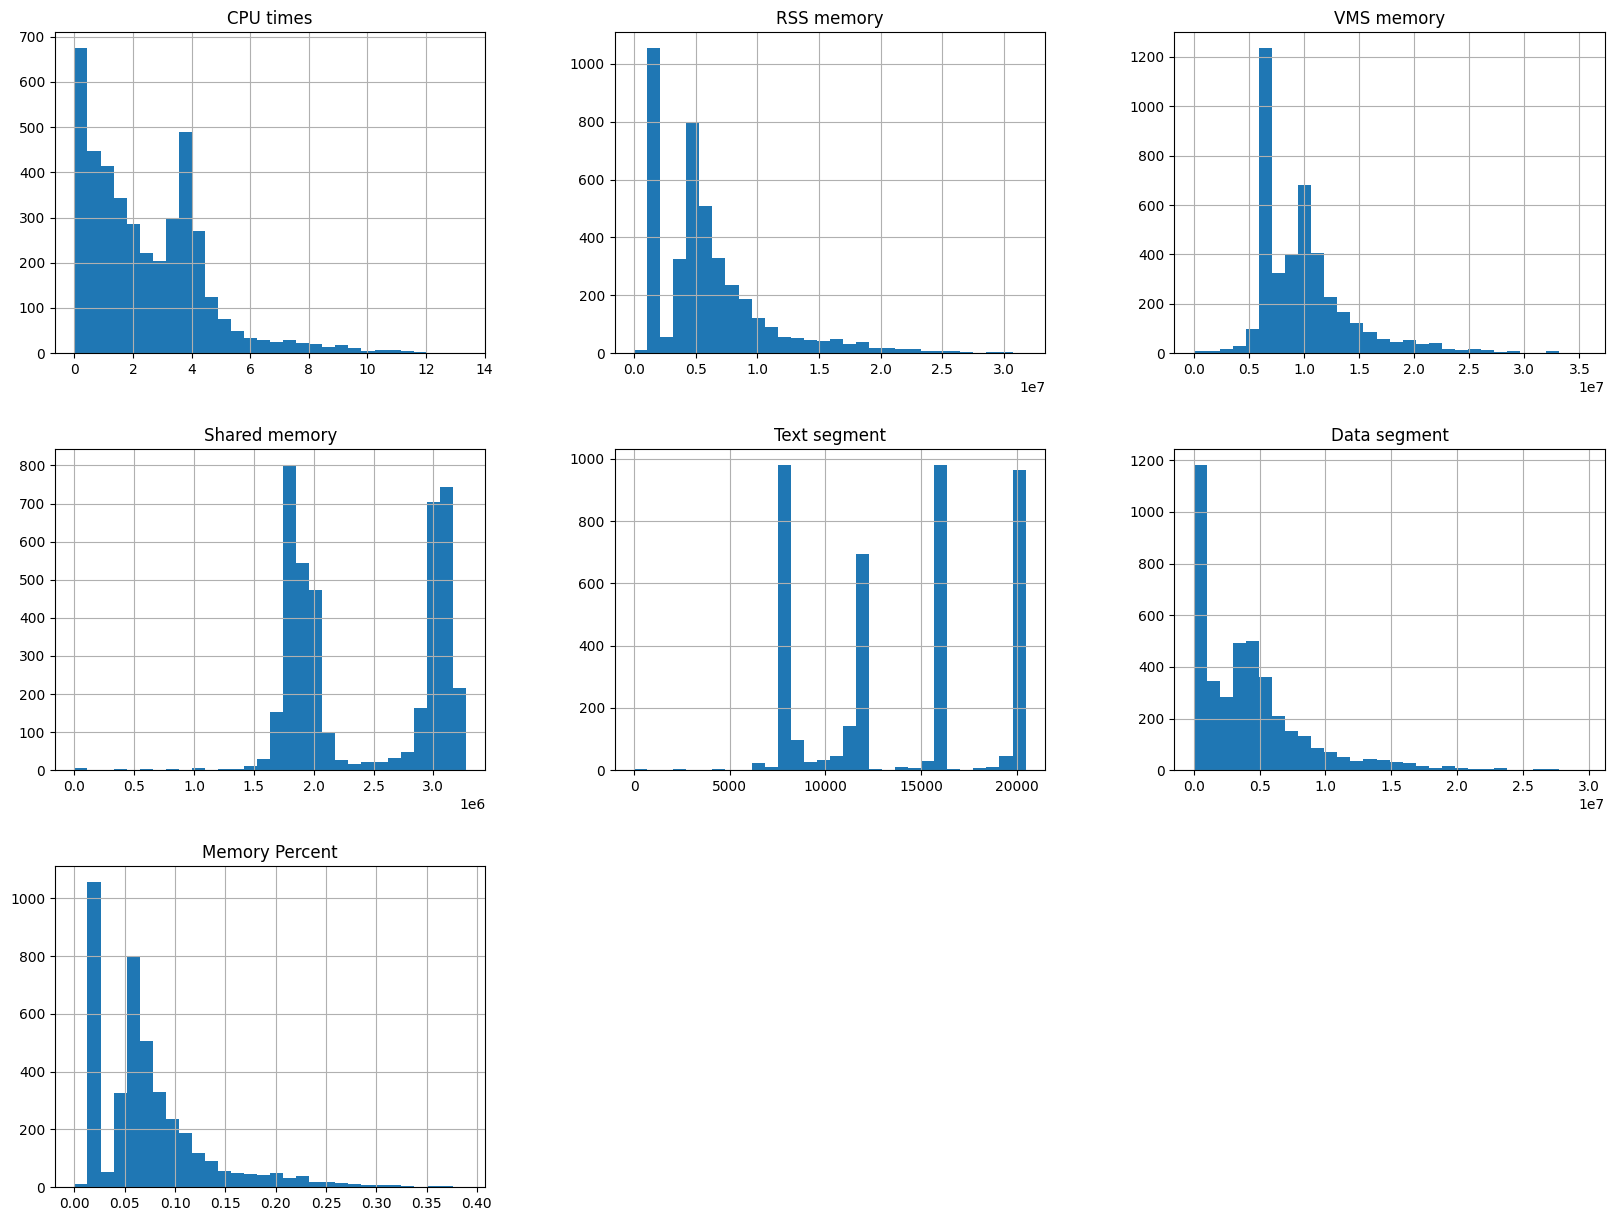

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=30, figsize=(20,15))
plt.show()

- The text section is clearly segregated in 4 segments
- there are a lot of zeros in cpu times, those need to be removed

In [26]:
corr_matrix  = X.corr()
corr_matrix['CPU times'].sort_values(ascending=False)

CPU times         1.000000
VMS memory        0.323033
Data segment      0.291830
Memory Percent    0.236761
RSS memory        0.236742
Shared memory     0.086307
Text segment      0.048346
Name: CPU times, dtype: float64

### Traning and prediction pipeline

In [27]:
y = X['CPU times']
X.drop('CPU times', axis=1, inplace=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [33]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.28557474453199266


#### apply grid search for performance improvement

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


In [36]:
best_params = grid_search.best_params_

print("Best parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Squared Error: 0.2843810042630395


In [37]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model2 = pickle.load(open('model.pkl', 'rb'))

In [38]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.28557474453199266


### Trying out various models

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(kernel="rbf")
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"{name} MSE: {mean_squared_error(y_test, predictions)}")

Linear Regression MSE: 2.6151094371401387
Decision Tree MSE: 0.3876965496368039
Random Forest MSE: 0.28779903454478856
SVR MSE: 2.7707275592000644


### Using Xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 5],
    'reg_lambda': [0, 0.1, 0.5]
}


grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error',verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")

### Calculating the overhead for the differnt models

In [49]:
#get the average time taken by each model
import time
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

model_forest = RandomForestRegressor()
model_forest.fit(X_train, y_train)

model_svr = SVR(kernel="rbf")
model_svr.fit(X_train, y_train)

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

start = time.time()
model_linear.predict(X_test)
end = time.time()

print(f"Linear Regression: {end-start} seconds")

start = time.time()
model_tree.predict(X_test)
end = time.time()

print(f"Decision Tree: {end-start} seconds")

start = time.time()
model_forest.predict(X_test)
end = time.time()

print(f"Random Forest: {end-start} seconds")   

start = time.time()
model_svr.predict(X_test)
end = time.time()

print(f"SVR: {end-start} seconds")

start = time.time()
model_xgb.predict(X_test)
end = time.time()

print(f"XGBoost: {end-start} seconds")

Linear Regression: 0.0008938312530517578 seconds
Decision Tree: 0.0008556842803955078 seconds
Random Forest: 0.015684843063354492 seconds
SVR: 0.05260109901428223 seconds
XGBoost: 0.04584693908691406 seconds
